In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("balanced_tb_data.csv")

In [3]:
df_test = pd.read_csv("solicited_test.csv")

In [4]:
df1 = df.copy()

In [5]:
df_test1 = df_test.copy()

In [6]:
# 1. Split full data into features and target
X = df.drop('tb_status', axis=1)
y = df['tb_status']

In [7]:
# 2. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
# 3. Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [9]:
# 4. Train Logistic Regression on ALL features (clinical + audio)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [10]:

# 5. Predict on validation
y_pred = logreg.predict(X_val_scaled)
y_prob = logreg.predict_proba(X_val_scaled)[:, 1]

In [11]:
# 6. Evaluation Metrics
print(" Accuracy:", accuracy_score(y_val, y_pred))
print("\n Classification Report:\n", classification_report(y_val, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\n ROC AUC Score:", roc_auc_score(y_val, y_prob))

 Accuracy: 0.9984693877551021

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960


 Confusion Matrix:
 [[977   3]
 [  0 980]]

 ROC AUC Score: 0.999996876301541


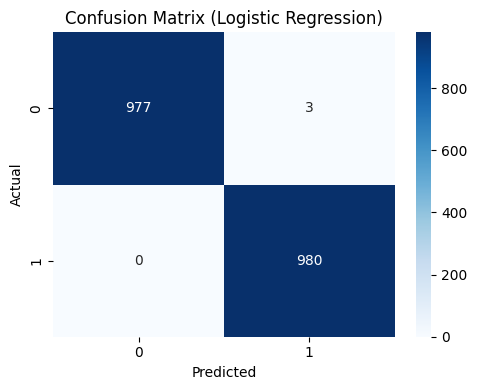

In [12]:
# ✅ Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [13]:
# ✅ Now extract ONLY clinical features from df (not df1) for importance
clinical_features = [col for col in df.columns if not col.startswith('feat_') and col != 'tb_status']
coef_df = pd.DataFrame({
    'feature': X.columns,  # All features
    'coefficient': logreg.coef_[0]
})

In [14]:
# Filter to clinical features only
clinical_importance = coef_df[coef_df['feature'].isin(clinical_features)].copy()
clinical_importance['importance'] = np.abs(clinical_importance['coefficient'])

In [17]:
# Sort and get top 5
top5 = clinical_importance.sort_values(by='importance', ascending=False).head(6)

# ✅ Print Top 5 Clinical Features
print("\n Top 5 Most Important Clinical Features:\n", top5[['feature', 'importance']])



 Top 5 Most Important Clinical Features:
           feature  importance
771        weight    2.571312
769           age    1.335535
779   smoke_lweek    1.067957
775    hemoptysis    1.036022
768           sex    0.753832
781  night_sweats    0.749850


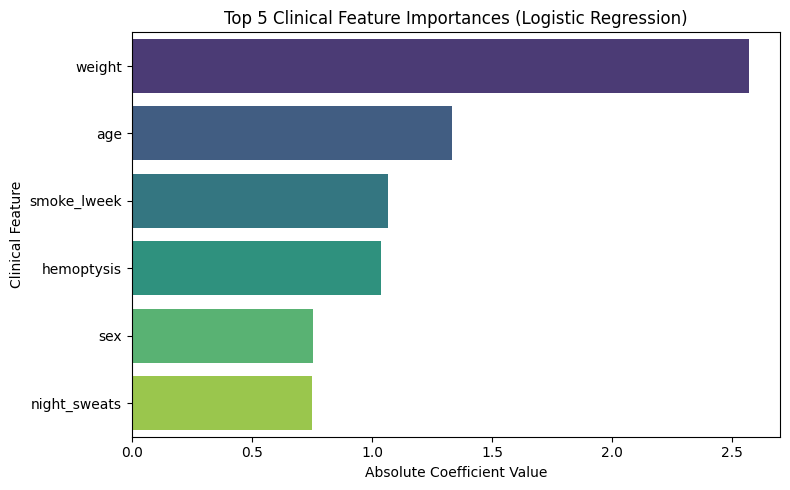

In [18]:

# ✅ Plot Feature Importances
plt.figure(figsize=(8, 5))
sns.barplot(data=top5, x='importance', y='feature', palette='viridis')
plt.title("Top 5 Clinical Feature Importances (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Clinical Feature")
plt.tight_layout()
plt.show()

# Building Model with Random Forest

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_rf = df.copy()  # 🔁 for RF to avoid clashes

In [21]:
# Split into features and target
X_rf = df_rf.drop('tb_status', axis=1)
y_rf = df_rf['tb_status']

In [22]:
# Train-test split
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_rf, y_rf, test_size=0.2, stratify=y_rf, random_state=42)

In [23]:
# Scale features
scaler_rf = StandardScaler()
X_train_rf_scaled = scaler_rf.fit_transform(X_train_rf)
X_val_rf_scaled = scaler_rf.transform(X_val_rf)

In [24]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf_scaled, y_train_rf)

RandomForestClassifier(random_state=42)

In [25]:
# Predict on validation
y_pred_rf = rf_model.predict(X_val_rf_scaled)
y_prob_rf = rf_model.predict_proba(X_val_rf_scaled)[:, 1]

In [26]:
# Evaluation
print(" Random Forest Accuracy:", accuracy_score(y_val_rf, y_pred_rf))
print("\n Classification Report:\n", classification_report(y_val_rf, y_pred_rf))
print("\n Confusion Matrix:\n", confusion_matrix(y_val_rf, y_pred_rf))
print("\n ROC AUC Score:", roc_auc_score(y_val_rf, y_prob_rf))

 Random Forest Accuracy: 0.9974489795918368

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00       980

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960


 Confusion Matrix:
 [[975   5]
 [  0 980]]

 ROC AUC Score: 0.9999885464389837


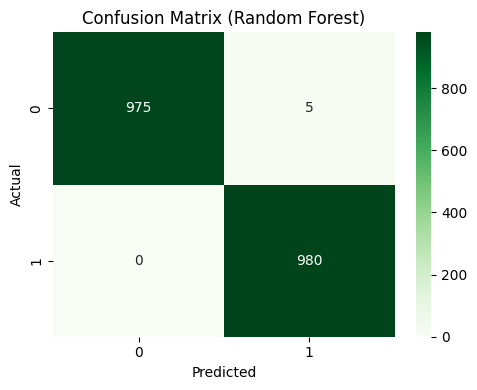

In [27]:
# ✅ Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val_rf, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [28]:
# Clinical feature importance
clinical_features_rf = [col for col in df_rf.columns if not col.startswith('feat_') and col != 'tb_status']

# Extract feature importances
feature_importances_rf = pd.DataFrame({
    'feature': X_rf.columns,
    'importance': rf_model.feature_importances_
})

In [29]:

# Filter to clinical features
clinical_importances_rf = feature_importances_rf[feature_importances_rf['feature'].isin(clinical_features_rf)].copy()


In [32]:
# Get top 5
top5_clinical_rf = clinical_importances_rf.sort_values(by='importance', ascending=False).head(6)


In [33]:
# ✅ Print Top 5 Clinical Features
print("\n Top 6 Most Important Clinical Features (RF):\n", top5_clinical_rf)


 Top 6 Most Important Clinical Features (RF):
                 feature  importance
769                 age    0.084965
775          hemoptysis    0.058368
772  reported_cough_dur    0.048071
771              weight    0.044173
779         smoke_lweek    0.041715
781        night_sweats    0.041658


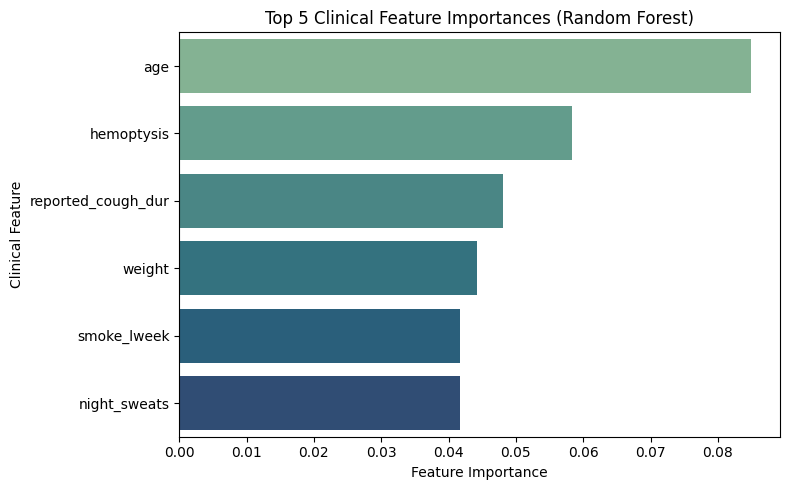

In [34]:
# ✅ Plot Feature Importances
plt.figure(figsize=(8, 5))
sns.barplot(data=top5_clinical_rf, x='importance', y='feature', palette='crest')
plt.title("Top 5 Clinical Feature Importances (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Clinical Feature")
plt.tight_layout()
plt.show()

# Building model with XGBOOST

In [38]:
import xgboost as xgb
from xgboost import plot_importance


In [39]:
df_xgb = df.copy()

In [42]:
df_test_xgb = df_test.copy()

In [43]:
# Split into features and target
X_xgb = df_xgb.drop('tb_status', axis=1)
y_xgb = df_xgb['tb_status']

In [44]:
# Train-test split
X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, stratify=y_xgb, random_state=42)

In [45]:
# Scale features

scaler_xgb = StandardScaler()
X_train_xgb_scaled = scaler_xgb.fit_transform(X_train_xgb)
X_val_xgb_scaled = scaler_xgb.transform(X_val_xgb)

In [46]:
# Train XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_xgb_scaled, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [47]:
# Predict on validation set
y_pred_xgb = xgb_model.predict(X_val_xgb_scaled)
y_prob_xgb = xgb_model.predict_proba(X_val_xgb_scaled)[:, 1]

In [48]:
# Evaluation
print(" XGBoost Accuracy:", accuracy_score(y_val_xgb, y_pred_xgb))
print("\n Classification Report:\n", classification_report(y_val_xgb, y_pred_xgb))
print("\n Confusion Matrix:\n", confusion_matrix(y_val_xgb, y_pred_xgb))
print("\n ROC AUC Score:", roc_auc_score(y_val_xgb, y_prob_xgb))

 XGBoost Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960


 Confusion Matrix:
 [[980   0]
 [  0 980]]

 ROC AUC Score: 1.0


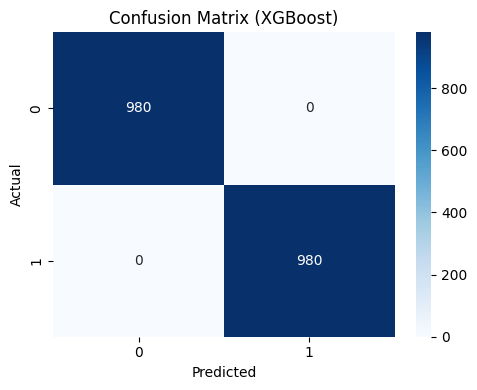

In [49]:
# ✅ Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val_xgb, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [50]:
# ✅ Clinical feature importance
clinical_features_xgb = [col for col in df_xgb.columns if not col.startswith('feat_') and col != 'tb_status']

In [51]:
# Extract feature importances
feature_importances_xgb = pd.DataFrame({
    'feature': X_xgb.columns,
    'importance': xgb_model.feature_importances_
})

In [52]:
# Filter to only clinical features
clinical_importances_xgb = feature_importances_xgb[feature_importances_xgb['feature'].isin(clinical_features_xgb)].copy()

In [54]:
# Get top 5
top5_clinical_xgb = clinical_importances_xgb.sort_values(by='importance', ascending=False).head(6)

In [55]:

# ✅ Print Top 5 Clinical Features
print("\n Top 5 Most Important Clinical Features (XGBoost):\n", top5_clinical_xgb)


 Top 5 Most Important Clinical Features (XGBoost):
                 feature  importance
771              weight    0.871946
768                 sex    0.020224
769                 age    0.012392
772  reported_cough_dur    0.006901
779         smoke_lweek    0.005799
775          hemoptysis    0.003359


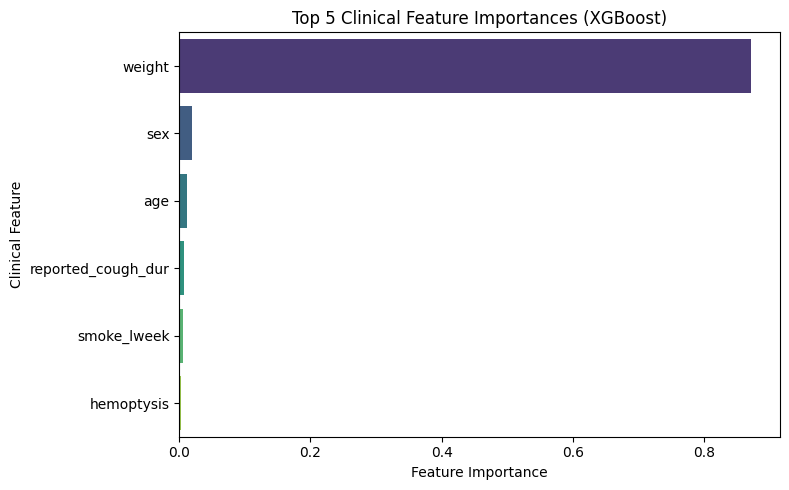

In [56]:
# ✅ Plot Feature Importances
plt.figure(figsize=(8, 5))
sns.barplot(data=top5_clinical_xgb, x='importance', y='feature', palette='viridis')
plt.title("Top 5 Clinical Feature Importances (XGBoost)")
plt.xlabel("Feature Importance")
plt.ylabel("Clinical Feature")
plt.tight_layout()
plt.show()

# Building model with support vector machine

In [57]:
from sklearn.svm import SVC

In [58]:
df_svm = df.copy()

In [59]:
df_test_svm = df_test.copy()

In [60]:
# Split into features and target
X_svm = df_svm.drop('tb_status', axis=1)
y_svm = df_svm['tb_status']

In [61]:
# Train-test split
X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(X_svm, y_svm, test_size=0.2, stratify=y_svm, random_state=42)

In [62]:
# Scale features
scaler_svm = StandardScaler()
X_train_svm_scaled = scaler_svm.fit_transform(X_train_svm)
X_val_svm_scaled = scaler_svm.transform(X_val_svm)

In [63]:
# Train SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_svm_scaled, y_train_svm)

SVC(kernel='linear', probability=True, random_state=42)

In [64]:
# Predict on validation set
y_pred_svm = svm_model.predict(X_val_svm_scaled)
y_prob_svm = svm_model.predict_proba(X_val_svm_scaled)[:, 1]

In [65]:
# ✅ Evaluation
print(" SVM Accuracy:", accuracy_score(y_val_svm, y_pred_svm))
print("\n Classification Report:\n", classification_report(y_val_svm, y_pred_svm))
print("\n Confusion Matrix:\n", confusion_matrix(y_val_svm, y_pred_svm))
print("\n ROC AUC Score:", roc_auc_score(y_val_svm, y_prob_svm))

 SVM Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960


 Confusion Matrix:
 [[980   0]
 [  0 980]]

 ROC AUC Score: 1.0


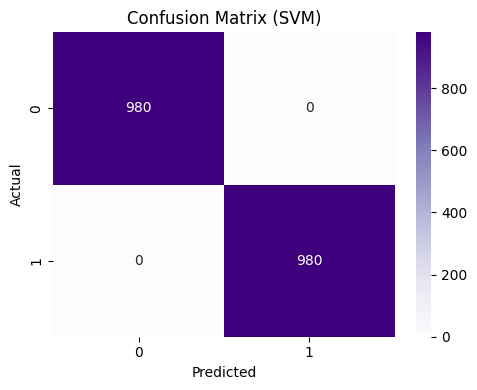

In [66]:
# ✅ Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val_svm, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [67]:
# Clinical Feature Importance
clinical_features_svm = [col for col in df_svm.columns if not col.startswith('feat_') and col != 'tb_status']

# Create DataFrame of feature importances from model coefficients
coef_df = pd.DataFrame({
    'feature': X_svm.columns,
    'coef': svm_model.coef_[0]
})

In [68]:
# Filter to clinical features only
clinical_coef_df = coef_df[coef_df['feature'].isin(clinical_features_svm)].copy()

In [69]:
# Compute absolute value for importance
clinical_coef_df['importance'] = clinical_coef_df['coef'].abs()

# Get top 5 most important
top5_clinical_svm = clinical_coef_df.sort_values(by='importance', ascending=False).head(5)

# ✅ Print Top 5 Clinical Features
print("\n Top 5 Most Important Clinical Features (SVM):\n", top5_clinical_svm[['feature', 'importance']])



 Top 5 Most Important Clinical Features (SVM):
          feature  importance
771       weight    0.513084
769          age    0.339058
779  smoke_lweek    0.248019
768          sex    0.211517
775   hemoptysis    0.201523


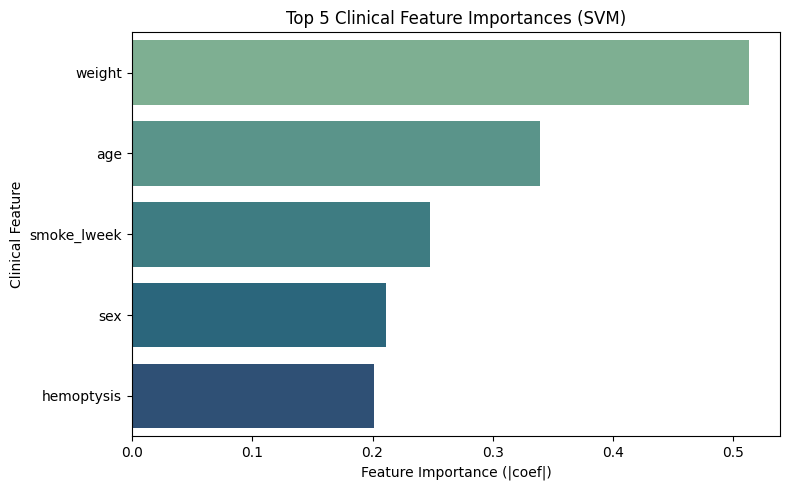

In [70]:

# ✅ Plot Top 5
plt.figure(figsize=(8, 5))
sns.barplot(data=top5_clinical_svm, x='importance', y='feature', palette='crest')
plt.title("Top 5 Clinical Feature Importances (SVM)")
plt.xlabel("Feature Importance (|coef|)")
plt.ylabel("Clinical Feature")
plt.tight_layout()
plt.show()

# Building model with deep Multi Layer Perceptron

In [72]:
wer = pd.read_csv("solicited_test_rf_predictions.csv")

In [73]:
wer.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,tb_prior_Pul,hemoptysis,heart_rate,temperature,weight_loss,smoke_lweek,fever,night_sweats,tb_predicted_rf,tb_probability_rf
0,-0.034994,0.025785,-0.126753,-0.032978,-0.104685,-0.141457,0.080810,-0.008430,0.025698,-0.357474,...,0,0,102,36.3,0,0,0,0,1,0.605
1,-0.017907,0.014444,-0.149634,-0.028727,-0.092394,-0.137203,0.039822,-0.006732,0.037899,-0.338116,...,0,0,102,36.3,0,0,0,0,1,0.570
2,0.019554,0.017160,-0.110186,-0.037742,-0.016508,-0.139233,0.051114,-0.017611,0.010689,-0.309711,...,0,0,102,36.3,0,0,0,0,1,0.610
3,-0.065054,0.040636,-0.175130,-0.022170,-0.118889,-0.120363,0.030802,-0.013428,-0.001530,-0.352130,...,0,0,102,36.3,0,0,0,0,1,0.640
4,-0.042754,0.042994,-0.087392,-0.029497,-0.106971,-0.116307,0.063567,-0.000677,-0.016347,-0.395569,...,0,0,94,36.7,0,0,1,1,1,0.560


In [74]:
wer['tb_predicted_rf'].value_counts()

tb_predicted_rf
1    7881
0    1868
Name: count, dtype: int64

In [80]:
wer['tb_predicted_rf'].mean()

np.float64(0.8083906041645297)

In [76]:
wd = pd.read_csv("solicited_test_with_predictions.csv")

In [77]:
wd.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,tb_prior_Pul,hemoptysis,heart_rate,temperature,weight_loss,smoke_lweek,fever,night_sweats,tb_predicted,tb_probability
0,-0.034994,0.025785,-0.126753,-0.032978,-0.104685,-0.141457,0.080810,-0.008430,0.025698,-0.357474,...,0,0,102,36.3,0,0,0,0,0,7.055362e-08
1,-0.017907,0.014444,-0.149634,-0.028727,-0.092394,-0.137203,0.039822,-0.006732,0.037899,-0.338116,...,0,0,102,36.3,0,0,0,0,0,1.177400e-07
2,0.019554,0.017160,-0.110186,-0.037742,-0.016508,-0.139233,0.051114,-0.017611,0.010689,-0.309711,...,0,0,102,36.3,0,0,0,0,0,2.243861e-06
3,-0.065054,0.040636,-0.175130,-0.022170,-0.118889,-0.120363,0.030802,-0.013428,-0.001530,-0.352130,...,0,0,102,36.3,0,0,0,0,0,9.386345e-08
4,-0.042754,0.042994,-0.087392,-0.029497,-0.106971,-0.116307,0.063567,-0.000677,-0.016347,-0.395569,...,0,0,94,36.7,0,0,1,1,0,3.628098e-03


In [78]:
wd['tb_predicted'].value_counts()

tb_predicted
0    5971
1    3778
Name: count, dtype: int64

In [79]:
wd['tb_predicted'].mean()

np.float64(0.38752692583854753)

In [81]:
err = pd.read_csv("solicited_test_with_predictions_MLP.csv")

In [82]:
err.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,tb_prior_Pul,hemoptysis,heart_rate,temperature,weight_loss,smoke_lweek,fever,night_sweats,tb_predicted,tb_probability
0,-0.034994,0.025785,-0.126753,-0.032978,-0.104685,-0.141457,0.080810,-0.008430,0.025698,-0.357474,...,0,0,102,36.3,0,0,0,0,0,1.560441e-08
1,-0.017907,0.014444,-0.149634,-0.028727,-0.092394,-0.137203,0.039822,-0.006732,0.037899,-0.338116,...,0,0,102,36.3,0,0,0,0,0,3.251938e-07
2,0.019554,0.017160,-0.110186,-0.037742,-0.016508,-0.139233,0.051114,-0.017611,0.010689,-0.309711,...,0,0,102,36.3,0,0,0,0,0,3.121874e-06
3,-0.065054,0.040636,-0.175130,-0.022170,-0.118889,-0.120363,0.030802,-0.013428,-0.001530,-0.352130,...,0,0,102,36.3,0,0,0,0,0,3.267495e-07
4,-0.042754,0.042994,-0.087392,-0.029497,-0.106971,-0.116307,0.063567,-0.000677,-0.016347,-0.395569,...,0,0,94,36.7,0,0,1,1,0,2.596718e-02


In [83]:
err['tb_predicted'].value_counts()

tb_predicted
0    5304
1    4445
Name: count, dtype: int64